In [128]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt

In [129]:
# ns = [int(n) for n in np.logspace(1,3,8)]
n = 100
k = 20
lamda_scale = 0.5
scale = 1
es = np.logspace(-8,-1,20)
title_str = f'spd_backward_error_n={n}_k={k}_lambda={lamda_scale}'
num_experiments = 100

In [130]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    # np.random.seed(rand_seed)    \
    # add noise
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B-inv(B_inv_approx),ord=2)
    bound = 2*e1*norm(A,ord=2)**2
    full_bound = bound + 4*lamda*e2*(cond(V)*A_inv_B_norm+lamda*e1)**2
    return error,bound,full_bound


In [131]:
errors = np.zeros(len(es),dtype=float)
bounds = np.zeros(len(es),dtype=float)
full_bounds = np.zeros(len(es),dtype=float)

A = np.random.normal(size=(n,n),scale= scale)
A = A@A.T # make A positive semidefinite
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = U.copy()
svals = np.linalg.svd(A,compute_uv=False)
sigma_min, sigma_max = np.min(svals), np.max(svals)
lamda = lamda_scale*sigma_min #np.max(np.linalg.svd(A,compute_uv=False))/2
B = A + lamda*U@V.T
A_inv_B_norm = norm(inv(A)@B,ord=2)
for i,e in enumerate(es):
    e_i = np.zeros(num_experiments); b_i = np.zeros(num_experiments); f_i = np.zeros(num_experiments)
    e1 = e; e2 = e
    for t in range(num_experiments):
        e_i[t],b_i[t],f_i[t] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
    errors[i] = np.mean(e_i)
    bounds[i] = np.mean(b_i)
    full_bounds[i] = np.mean(f_i)
    # print("error = %f, bound = %f" %(errors[i],bounds[i]))

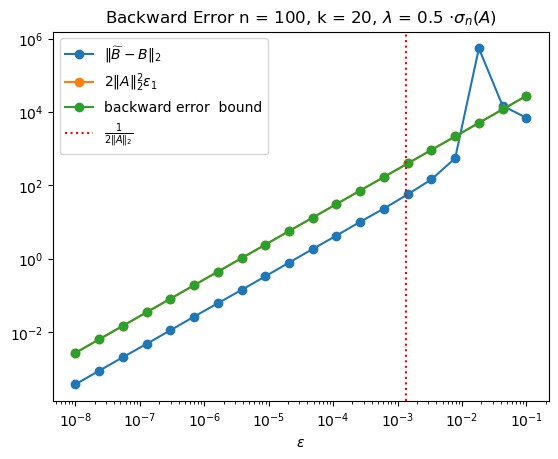

In [132]:
plt.loglog(es,errors,label=r'$\|\widetilde{B}-B\|_2$',marker='o')
plt.loglog(es,bounds,label=r'$2\|A\|_2^2 \epsilon_1$',marker='o')
plt.loglog(es,full_bounds,label='backward error  bound',marker='o')
# plt.loglog(es, 1/2/(lamda*es+cond(V)*norm(inv(A)@B,ord=2)),label=r'$\frac{1}{2 \left( \kappa(V)\|A^{-1}B \|_2  + \lambda * \epsilon_1 \right) }$',marker='o')
# plt.loglog(es, 1/4/(lamda*es+cond(V)*norm(inv(A)@B,ord=2))**2,label=r'$\frac{1}{4 \left( \kappa(V)\|A^{-1}B \|_2  + \lambda * \epsilon_1 \right) ^2 }$',marker='o')

# plt.loglog(es,es)
plt.axvline(x=1/2/norm(A,ord=2),ls=':',color='red',label=r'$\frac{1}{2 \|A\|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon$')
plt.title(f'Backward Error n = {n}, k = {k}, '+r'$\lambda$'+f' = {lamda_scale} '+r'$\cdot\sigma_{n}(A)$')  
plt.savefig('spd/'+title_str+'_same_epsilon_small_update.png')